In [298]:
import pandas as pd

from sklearn import *

from __future__ import division

from tabulate import tabulate
from IPython.display import HTML

import plotly.express as px # precisa rodar no jupyter/IPython para exibir corretamente
import pylab as plt #as vezes plotar manualmente dá menos trabalho

import numpy as np

In [275]:
dados = pd.read_csv("c:/Users/Felipe/Documents/GitHub/pythonstat/ex_classificador/SAheart.data.csv", sep=",")

In [276]:
dados.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [277]:
dados.famhist = dados.famhist == 'Present'  ;

Implementar o modelo de regressao SGD, naive bayes e regressao logistica para identificar casos de doenca do coracao (CHD) com os dados da base

https://github.com/advinstai/Aprendizagem-estatistica-classificacao/blob/master/SAheart.data

faca a preparacao dos dados para utilizar os algoritmos e compare a qualidade dos 3 métodos, usando as metricas apresentadas.

In [278]:
kernelSGD = linear_model.SGDClassifier()
kernelLog = linear_model.LogisticRegressionCV()
kernelGauss = naive_bayes.GaussianNB()

In [279]:
tamanhoTeste = 0.3

In [280]:
X = dados.drop(columns='chd');
y = dados.loc[:, ['chd']] 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=tamanhoTeste)

In [315]:
kernelLog.fit(X_train, y_train);
y_p = kernelLog.predict(X_test)

In [316]:
print metrics.classification_report(y_test,y_p)

LogScore = {
    'precision': metrics.precision_score(y_test,y_p),
    'recall': metrics.recall_score(y_test,y_p),
    'f1': metrics.f1_score(y_test,y_p)}
    
            

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.56      0.60      0.58        40

   micro avg       0.75      0.75      0.75       139
   macro avg       0.70      0.70      0.70       139
weighted avg       0.75      0.75      0.75       139



In [318]:
print metrics.confusion_matrix(y_test,y_p)

[[80 19]
 [16 24]]


In [320]:
kernelGauss.fit(X_train, y_train);

y_pdf = kernelGauss.predict_proba(X_test)
y_p = kernelGauss.predict(X_test)

In [327]:
prob = pd.DataFrame();

prob['pred'] = kernelGauss.predict(X_test)
prob['probA'] = kernelGauss.predict_proba(X_test)[:,0]
prob['probB'] = kernelGauss.predict_proba(X_test)[:,1]
prob['age'] = X_test.age.values

## Analise da probabilidade 

GaussianNB

In [338]:
px.scatter(data_frame=prob, y='probB',x='age', facet_col='pred')

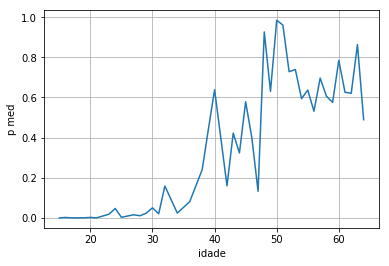

In [354]:
auxpreob = prob.groupby('age').mean()

plt.plot(auxpreob.index.values, auxpreob.probB.values);
#plt.plot(auxpreob.index.values, auxpreob.probA.values, '--k');
plt.grid(); plt.xlabel('idade'); plt.ylabel("p med");

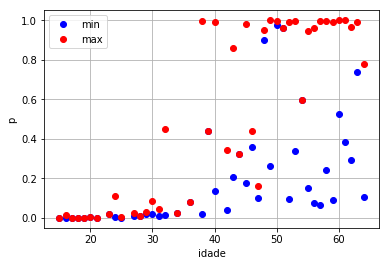

In [365]:
auxpreob = prob.groupby('age').min()

plt.plot(auxpreob.index.values, auxpreob.probB.values, "ob", label= "min");
#plt.plot(auxpreob.index.values, auxpreob.probA.values, '--k');
plt.grid(); plt.xlabel('idade'); plt.ylabel("p");

auxpreob = prob.groupby('age').max()

plt.plot(auxpreob.index.values, auxpreob.probB.values, "or", label="max");
#plt.plot(auxpreob.index.values, auxpreob.probA.values, '--k');
plt.xlabel('idade'); plt.ylabel("p"); plt.legend();


In [285]:
print metrics.classification_report(y,y_p)
GaussScore = {
    'precision': metrics.precision_score(y,y_p),
    'recall': metrics.recall_score(y,y_p),
    'f1': metrics.f1_score(y,y_p)}

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       302
           1       0.56      0.62      0.59       160

   micro avg       0.70      0.70      0.70       462
   macro avg       0.67      0.68      0.68       462
weighted avg       0.71      0.70      0.70       462



In [286]:
print metrics.confusion_matrix(y,y_p)

[[225  77]
 [ 61  99]]


Refazendo o SGD para classificacao:

In [287]:
kernelSGD.fit(X_train, y_train);
y_p = kernelSGD.predict(X);

In [288]:
print metrics.classification_report(y,y_p)
SGDScore = {
    'precision': metrics.precision_score(y,y_p),
    'recall': metrics.recall_score(y,y_p),
    'f1': metrics.f1_score(y,y_p)}

              precision    recall  f1-score   support

           0       0.85      0.48      0.62       302
           1       0.46      0.84      0.60       160

   micro avg       0.61      0.61      0.61       462
   macro avg       0.66      0.66      0.61       462
weighted avg       0.71      0.61      0.61       462



In [367]:
%precision 3
display((GaussScore, SGDScore, LogScore))

({'f1': 0.5892857142857144, 'precision': 0.5625, 'recall': 0.61875},
 {'f1': 0.5955555555555556,
  'precision': 0.46206896551724136,
  'recall': 0.8375},
 {'f1': 0.5783132530120482, 'precision': 0.5581395348837209, 'recall': 0.6})

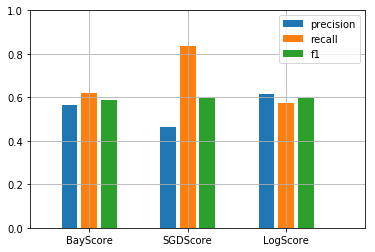

In [292]:
x1=np.arange(1,4)*5
p='precision'
plt.bar(height=[GaussScore[p], SGDScore[p], LogScore[p]], x=x1, label= p)

p='recall'
plt.bar(height=[GaussScore[p], SGDScore[p], LogScore[p]], x=x1+1, label= p)
 
p='f1'
plt.bar(height=[GaussScore[p], SGDScore[p], LogScore[p]], x=x1+2, label= p)

plt.xticks(x1+1, ('BayScore', 'SGDScore', 'LogScore')); plt.grid(); plt.legend()

plt.axis([3,20,0,1]);

### analise exploratoria

obesidade e idade



In [97]:
px.histogram(data_frame=dados, x='age', nbins=20, facet_col='chd')

In [293]:
dados['coracao'] = dados.chd.astype(str)

In [294]:
px.scatter(data_frame=dados, x=dados.obesity.name, y=dados.age.name, color='coracao')

In [295]:
px.density_heatmap(data_frame=dados, x=dados.obesity.name, y=dados.age.name, z='coracao', nbinsx=30)

In [296]:
dados['pred_coracao']=pd.Series(y_p)

In [297]:
#com predicao:
px.density_heatmap(data_frame=dados, x=dados.obesity.name, y=dados.age.name, z='pred_coracao')